In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("gold fund.csv")

In [3]:
df.head()

,ID,Gender,AMB,AccountSince,RelationshipSize,AvgMonthlyTxn,DematAccounts,FD_Nos,MF_nos,Equity_mfs,Debt_mfs,Balanced_Funds,ELSS,PMS_accounts,Trading_Accounts,Speciality_funds,Gold_Fund
0,25,1,297,22,2,14,0,1,1,0,0,0,0,0,0,0,0
1,46,1,138,56,7,22,2,1,2,0,1,0,1,1,0,0,0
2,47,1,228,2,1,2,0,0,0,0,0,0,0,0,0,0,0
3,61,1,190,16,1,16,0,0,0,0,0,0,1,0,0,0,0
4,79,1,187,14,1,14,1,0,0,0,0,0,0,0,0,0,0


In [4]:
# separate features and outcome variable
x=df.drop(columns=['ID','Gold_Fund'])
y=df.Gold_Fund

In [9]:
# Split and standardise the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
# st.fit(x_train)
x_train_std=st.fit_transform(x_train)
x_test_std=st.fit_transform(x_test)

In [10]:
x_train_std.shape

(655, 15)

In [11]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from livelossplot import PlotLossesKerasTF
from tensorflow.keras.metrics import Precision,Recall

In [12]:
model=Sequential()
model.add(Input(shape=(15,)))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [13]:
from tensorflow.keras.optimizers import SGD

In [14]:
model.compile(loss='binary_crossentropy',optimizer=SGD(learning_rate=0.01,momentum=0.60),
              metrics=['accuracy',Precision(),Recall()])

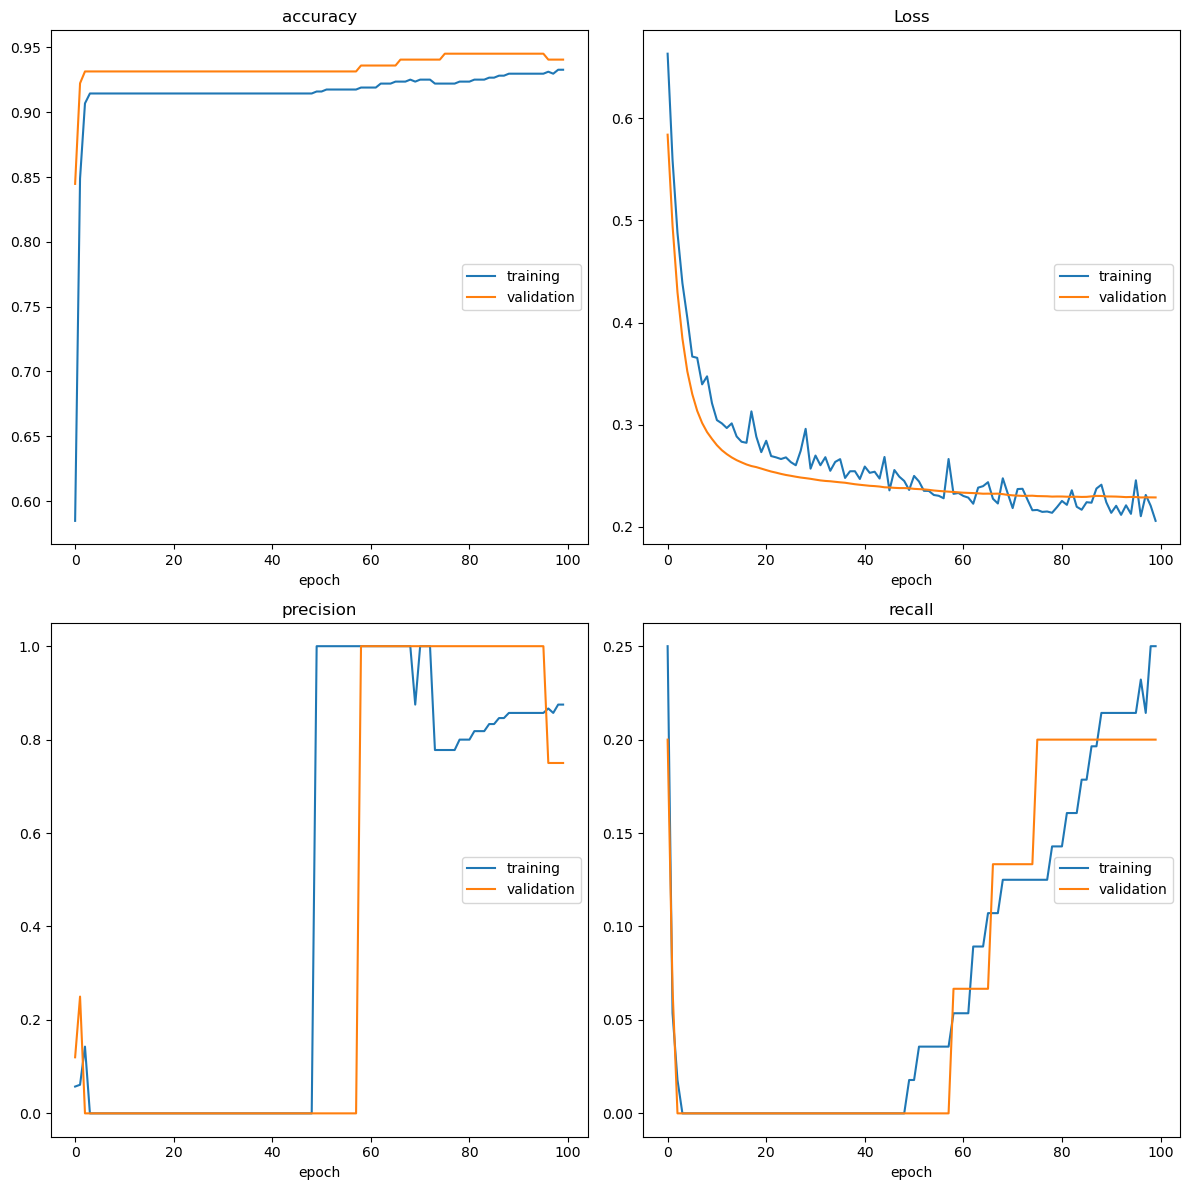

accuracy
	training         	 (min:    0.585, max:    0.933, cur:    0.933)
	validation       	 (min:    0.845, max:    0.945, cur:    0.941)
Loss
	training         	 (min:    0.206, max:    0.663, cur:    0.206)
	validation       	 (min:    0.229, max:    0.584, cur:    0.229)
precision
	training         	 (min:    0.000, max:    1.000, cur:    0.875)
	validation       	 (min:    0.000, max:    1.000, cur:    0.750)
recall
	training         	 (min:    0.000, max:    0.250, cur:    0.250)
	validation       	 (min:    0.000, max:    0.200, cur:    0.200)
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - accuracy: 0.9211 - loss: 0.2327 - precision: 0.8438 - recall: 0.2642 - val_accuracy: 0.9406 - val_loss: 0.2287 - val_precision: 0.7500 - val_recall: 0.2000


In [15]:
model.fit(x_train_std,y_train,epochs=100,batch_size=64,callbacks=[PlotLossesKerasTF()],validation_data=(x_test_std,y_test))

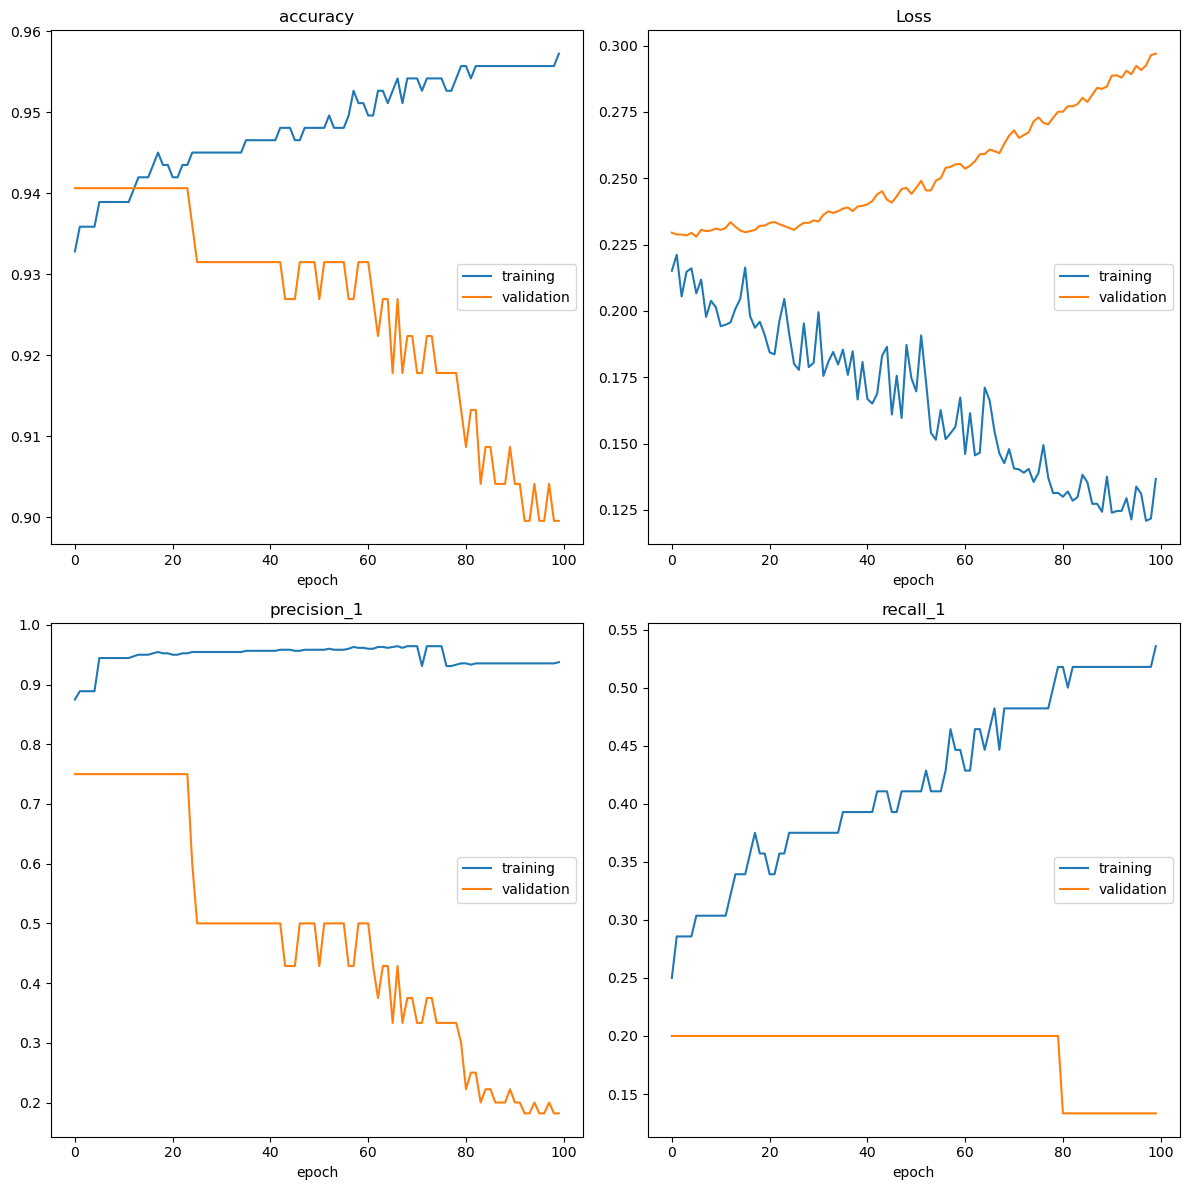

accuracy
	training         	 (min:    0.933, max:    0.957, cur:    0.957)
	validation       	 (min:    0.900, max:    0.941, cur:    0.900)
Loss
	training         	 (min:    0.121, max:    0.221, cur:    0.137)
	validation       	 (min:    0.228, max:    0.297, cur:    0.297)
precision_1
	training         	 (min:    0.875, max:    0.964, cur:    0.938)
	validation       	 (min:    0.182, max:    0.750, cur:    0.182)
recall_1
	training         	 (min:    0.250, max:    0.536, cur:    0.536)
	validation       	 (min:    0.133, max:    0.200, cur:    0.133)
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.9565 - loss: 0.1271 - precision_1: 0.9565 - recall_1: 0.5685 - val_accuracy: 0.8995 - val_loss: 0.2970 - val_precision_1: 0.1818 - val_recall_1: 0.1333


In [16]:
model.compile(loss='binary_crossentropy',optimizer='adam',
              metrics=['accuracy',Precision(),Recall()])
model.fit(x_train_std,y_train,epochs=100,batch_size=64,callbacks=[PlotLossesKerasTF()],validation_data=(x_test_std,y_test))

In [17]:
# Imbalance data
y_train.value_counts()

Gold_Fund
0    599
1     56
Name: count, dtype: int64

# Apply SMOTE

In [21]:
from imblearn.over_sampling import SMOTE
smk = SMOTE()
x_train_smote,y_train_smote=smk.fit_resample(x,y)

In [22]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_smote)))

Original dataset shape Counter({0: 803, 1: 71})
Resampled dataset shape Counter({0: 803, 1: 803})


In [23]:
print(x_train_smote.shape)
print(y_train_smote.shape)

(1606, 15)
(1606,)


In [24]:
# Split the data set into training and testing
x_train, x_test, y_train, y_test = train_test_split(x_train_smote,y_train_smote, test_size=0.2, random_state=2)

In [25]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std=scaler.transform(x_test)

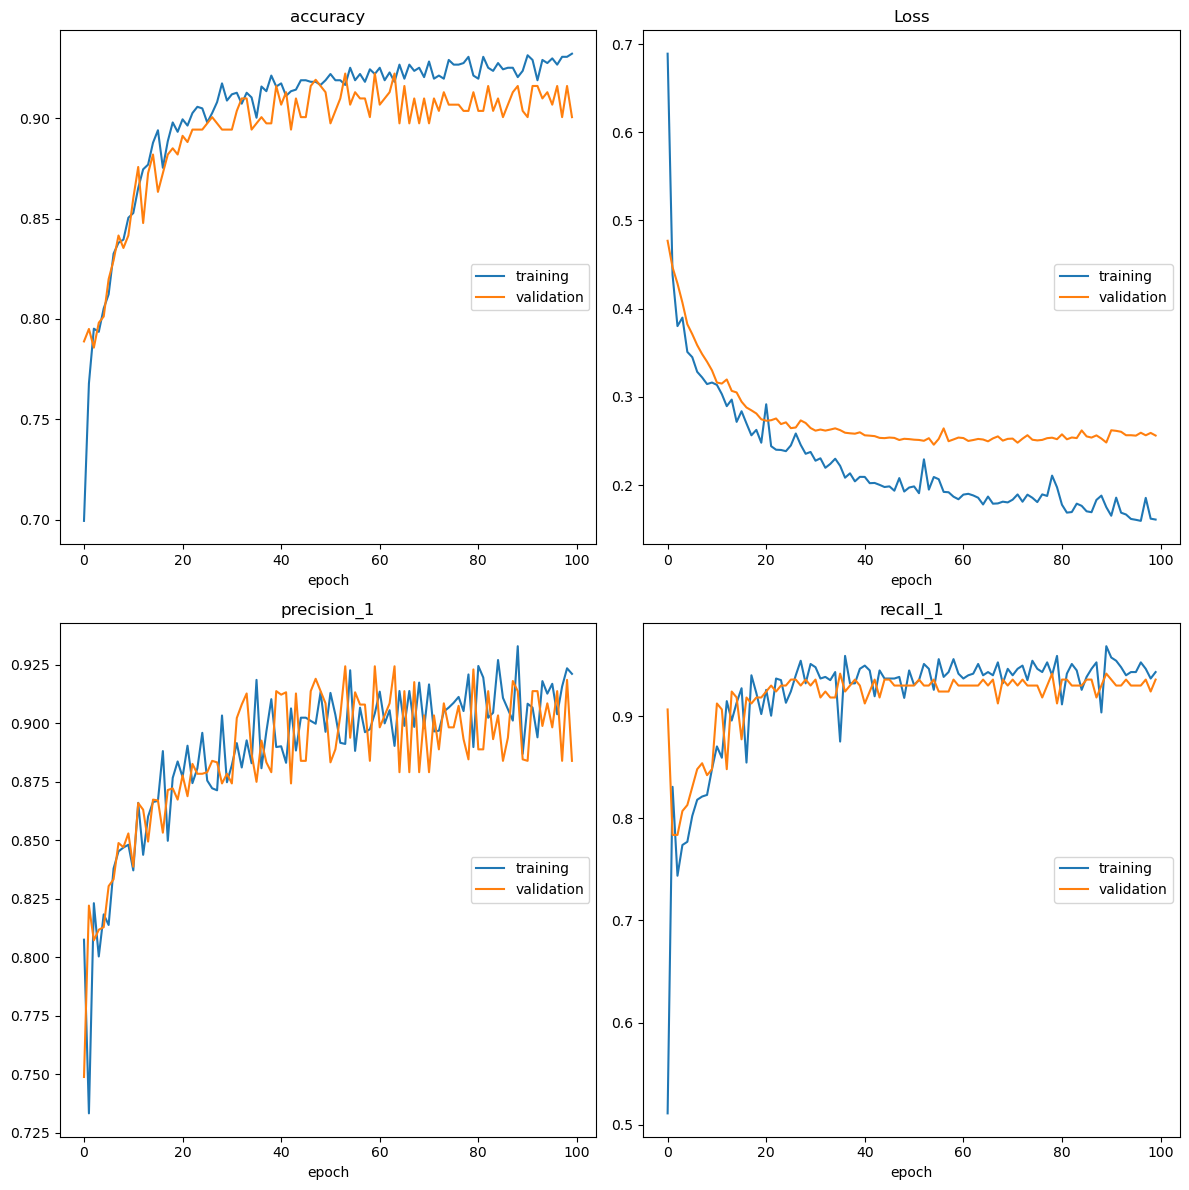

accuracy
	training         	 (min:    0.699, max:    0.932, cur:    0.932)
	validation       	 (min:    0.786, max:    0.922, cur:    0.901)
Loss
	training         	 (min:    0.160, max:    0.689, cur:    0.161)
	validation       	 (min:    0.246, max:    0.477, cur:    0.256)
precision_1
	training         	 (min:    0.733, max:    0.933, cur:    0.921)
	validation       	 (min:    0.749, max:    0.924, cur:    0.884)
recall_1
	training         	 (min:    0.511, max:    0.968, cur:    0.943)
	validation       	 (min:    0.784, max:    0.942, cur:    0.936)
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9204 - loss: 0.1846 - precision_1: 0.9132 - recall_1: 0.9243 - val_accuracy: 0.9006 - val_loss: 0.2562 - val_precision_1: 0.8840 - val_recall_1: 0.9357


In [26]:

model.fit(x_train_std,y_train,epochs=100,batch_size=64,callbacks=[PlotLossesKerasTF()],
          validation_data=(x_test_std,y_test))

# Random Search

In [28]:
#!pip install keras-tuner

In [29]:
import keras_tuner

In [30]:
def create_model(hp):
    model=Sequential()
    model.add(Input(shape=(15,)))
    model.add(Dense(hp.Choice('units',[10,15,20,25]),activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam',
              metrics=['accuracy',Precision(),Recall()])
    return(model)

In [31]:
tuner=keras_tuner.RandomSearch(create_model,objective='val_loss',max_trials=2)   # if max=4 it become grid search

Reloading Tuner from .\untitled_project\tuner0.json


In [ ]:
tuner.get_best_models()

In [ ]:
tuner.search(x_train_std,y_train,epochs=20,validation_data=(x_test_std,y_test))

In [ ]:
tuner.results_summary()

In [ ]:
models=tuner.get_best_models(num_models=2)

In [ ]:
models

In [ ]:
best_model=models[0]

In [ ]:
best_model.summary()